# **1-D Cutting Stock Problem**

The problem involves cutting pieces of a specified length into smaller pieces of specified lengths, minimizing the amount of wasted material. Let's consider having $m$ cables of length $l$. We want to cut $n$ smaller cables of various lengths $w_i$  | $i=1,2,...,n$.


This problem is related to Bin packing problem that it can be described mathematically as follows.

## **Bin Packing Problem**

There are $n$ items to be packed and an infinite number of available bins of size $B$. \
The sizes $0 \leq s_{i} \leq B$ of individual items are assumed to be known. \
The problem is to determine how to pack these $n$ items in bins of size $B$ so that the number of required bins is minimum.

Let's do some math:

In a simple formulation, a variable X indicates whether an item is packed in a given bin (or whether the small cable $i$ was cut from the large cable $j$ ), and a variable Y specifies if a bin is used in the solution or not (or whether cable $j$ was used or not). 

$$ X_{ij} = \left\{\begin{array}{ll}1 & \text{if item i is packed in bin j} \\
                                   0  & \text{otherwise} \end{array} \right.\\$$

$$ Y_j = \left\{\begin{array}{ll}   1  & \text{if bin $j$ is used} \\
                                   0  & \text{otherwise} \end{array} \right. $$

For simplicity in formulation let's assume that an upper bound $U$ of the number of bins is given so $i \in \{1,2,...,n\}$ and $j \in \{1,2,..., U\}$.

$$\text{minimize} \quad  \sum_{j=1}^U Y_{j}$$


subject to:

- Item i is packed in exactly one bin
$$ \quad \sum_{j=1}^U X_{ij} = 1  \text{ for } i=1,\cdots,n$$
- Capacity constraint for each bin: Sum of sizes of items packed into a bin does not exceed the size of the bin. 
$$\sum_{i=1}^n s_i X_{ij} \leq B Y_{j}               \text{ for } j=1,\cdots,U\\$$
- Strong Formulation

$$X_{ij} \leq Y_{j}                                  \text{ for } i=1,\cdots,n; j=1,\cdots,U\\$$
$$X_{ij} \in \{ 0,1 \}                            \text{ for }  i=1,\cdots,n; j=1,\cdots,U \\$$
$$Y_j \in \{ 0,1 \}                               \text{ for }  j=1,\cdots,U $$


Let's build an example:

In [1]:
B = 9 # Max Capacity: Cable are 9 meters long 
w = [2,3,4,5,6,7,8] # Demand: smaller cable pieces lenthgs
q = [4,2,6,6,2,2,2] # Demand: number of needed smaller pieces


def get_demand(items):
    w, q = items
    s=[]
    for j in range(len(w)):
        for i in range(q[j]):
            s.append(w[j])
    return s

demand = get_demand(items=(w, q))
demand

[2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 8, 8]

Next, we need to calculate the upper limit $U$ of the number of bins.

The bin packing problem has been for a long time a field for the development of heuristics. Heuristics are procedures for obtaining a solution based on rules that do not guarantee that the optimum will be reached. A well-known heuristics for this problem is first-fit decreasing (FFD), which consists of arranging the items in non-increasing order of their size, and then for each item try inserting it in the first open bin where it fits; if no such bin exists, then open a new bin and insert the item there. Here is a simple implementation in Python.

## First-Fit decreasing (FFD) approach

In [2]:
def FFD(s, B):
    """
    Implements the First-Fit Decreasing (FFD) heuristic for the Bin Packing Problem.

    Parameters:
        s (list): List of item weights.
        B (float): Bin capacity.

    Returns:
        list: List of bins, where each bin is represented as a list of item weights.
    """
    
    # The space remaining in bins currently in use
    remain_space = [B]
    solution = [[]]

    # For itmes ordered in descending order
    for item in sorted(s, reverse=True):

        # For each bin lest check if there is space avilable
        for j,free in enumerate(remain_space):
            # if there is space available the current item is packed in j
            if free >= item:
                remain_space[j] -= item
                solution[j].append(item)
                break
        # If the current item doesn’t fit in any bin, a new bin is created and the item is packed there. 
        else:
            solution.append([item])
            remain_space.append(B-item)
    return solution

In [3]:
solution_ffd = FFD(demand, B)
solution_ffd

[[8],
 [8],
 [7, 2],
 [7, 2],
 [6, 3],
 [6, 3],
 [5, 4],
 [5, 4],
 [5, 4],
 [5, 4],
 [5, 4],
 [5, 4],
 [2, 2]]

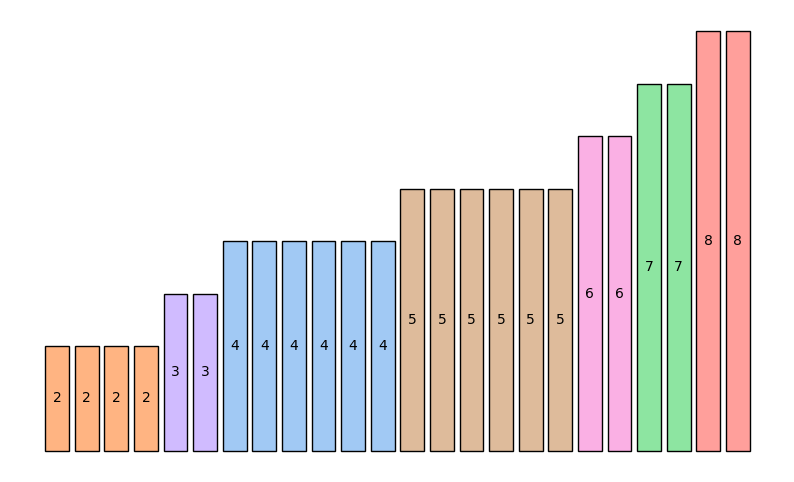

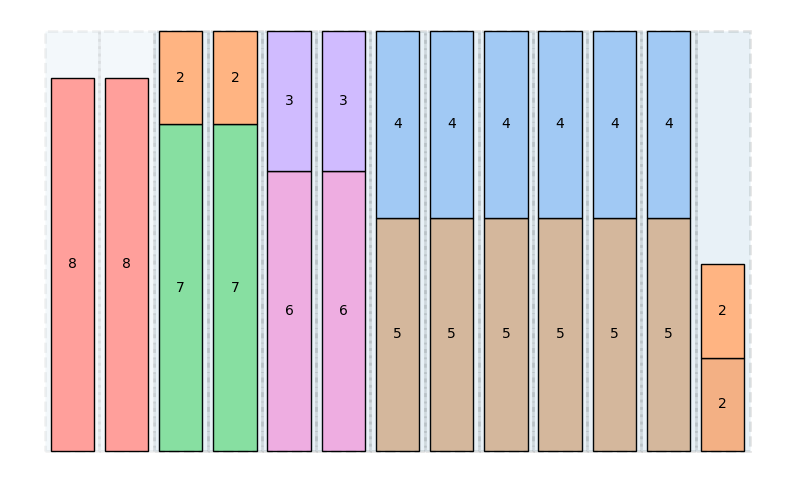

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd

def draw_rectangle(ax, x, y, ini_y = 0,  w=0.8, color=(1.0, 0.7058823529411765, 0.5098039215686274), label=None):
    rect = patches.Rectangle((x - w/2, ini_y), w, y, linewidth=1, edgecolor='black', facecolor=color)
    ax.add_patch(rect)
    if label is not None:
        ax.text(x, ini_y + y/2, label, ha='center', va='center', color='black', fontsize=10)
    ax.autoscale()
    return ax


def plot_demand(demand_list, B=None):
    labels = [str(i) for sublist in demand_list for i in sublist]
    pal    = sns.color_palette("pastel", len(set(labels)))
    label_color_dict = dict(zip(set(labels), pal))

    colors = [label_color_dict[lab] for lab in labels]
    positions = [i for i, sublist in enumerate(demand_list) for _ in sublist]

    data = pd.DataFrame({
        'x': positions,
        'y': [i for sublist in demand_list for i in sublist],
        'label': labels,
        'color': colors
    })


    used_position = {}

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')
    for index, row in data.iterrows():
        x = row['x']
        y = row['y']
        ini_y = used_position.get(x, 0)  
        w=0.8
        
        if B is not None:
            rect = patches.Rectangle((x - (w+0.2)/2, 0), w+0.2, B, linewidth=2, edgecolor='black', alpha=0.05, linestyle = '--')
            ax.add_patch(rect)
        ax = draw_rectangle(ax=ax, x=x, y=y, ini_y=ini_y, w=w, color=row['color'], label=row['label'])


        used_position[x] = ini_y + y

plot_demand([[d] for d in demand])
plot_demand(solution_ffd, B)


In [5]:
from pyscipopt import Model, quicksum, multidict

def bpp(s,B):
    """
    Parameters:
        s (list): List of item weights.
        B (float): Bin capacity.

    Returns:
        model: PySCIPOpt model representing the solved BPP.
    """

    # Number of items
    n = len(s)

    # Number of bins (calculated using the FFD heuristic)
    U = len(FFD(s,B))

    # Create a SCIP optimization model
    model = Model("bpp")

    # Decision variables
    #  y[j]: binary variable indicating if bin j is bing used
    x,y = {},{}

    # x[i, j]: binary variable indicating if item i is in bin j
    for i in range(n):
        for j in range(U):
            x[i,j] = model.addVar(vtype="B", name="x(%s,%s)"%(i,j))
        
    # y[j]: binary variable indicating if bin j is use
    for j in range(U):
        y[j] = model.addVar(vtype="B", name="y(%s)"%j)

    # Constraint: Each item must be assigned to exactly one bin
    for i in range(n):
        model.addCons(quicksum(x[i,j] for j in range(U)) == 1, "Assign(%s)"%i)

    # Constraint: Capacity constraint for each bin
    for j in range(U):
        model.addCons(quicksum(s[i]*x[i,j] for i in range(n)) <= B*y[j], "Capac(%s)"%j)

    # Constraint: Strong Formulation
    for j in range(U):
        for i in range(n):
            model.addCons(x[i,j] <= y[j], "Strong(%s,%s)"%(i,j))

    # Objective: Minimize the number of used bins
    model.setObjective(quicksum(y[j] for j in range(U)), "minimize")
    # Store decision variables in the model for further analysis
    model.data = x, y

    return model

def solveBinPacking(s,B):
    """
    Solves the Bin Packing Problem (BPP)
    and returns a list of bins containing the packed items.

    Parameters:
        s (list): List of item weights.
        B (float): Bin capacity.

    Returns:
        list: List of bins, where each bin is represented as a sorted list of item weights.
    """
    # Calculate the number of bins using the FFD heuristic
    U = len(FFD(s,B))

    # Create the BPP model
    model = bpp(s,B)
    x,_ = model.data

    # Colve the BPP model
    model.optimize()
    
    # Initialize bins as empty lists
    bins = [[] for i in range(U)]

    # Populate bins based on the solution
    for (i,j) in x:
        if model.getVal(x[i,j]) > .5:
            bins[j].append(s[i])
    
    # Remove empty bins
    for i in range(bins.count([])):
        bins.remove([])

    # Sort items within each bin
    for b in bins:
        b.sort()
    
    # Sort bins based on the first item in each bin
    bins.sort()
    
    return bins

In [6]:
solution = solveBinPacking(demand,B)
solution

[[2, 2, 4],
 [2, 6],
 [2, 7],
 [3, 5],
 [3, 6],
 [4, 5],
 [4, 5],
 [4, 5],
 [4, 5],
 [4, 5],
 [7],
 [8],
 [8]]

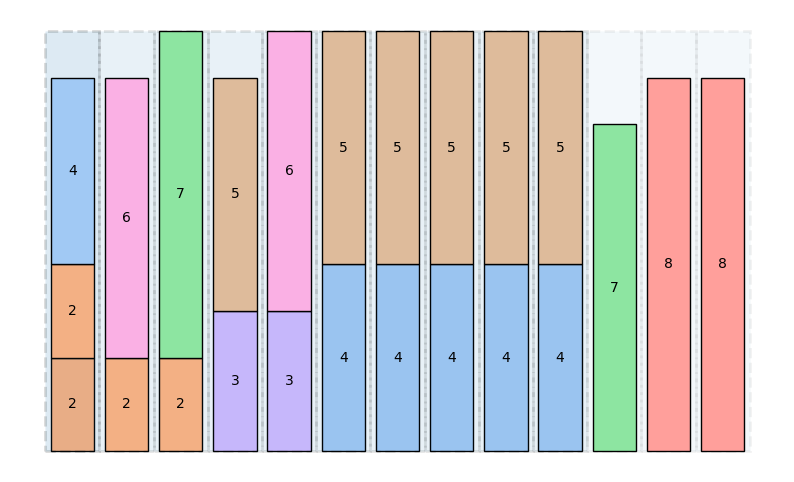

In [7]:
plot_demand(solution, B)

In [8]:
len(solution)

13

In [9]:
len(solution_ffd)

13

## Worese Case Sample

In [10]:
import numpy as np

while True:
    B = np.random.randint(5, 9)
    w = np.random.randint(2, B, 5)
    q = np.random.randint(1, 10, 5)
    demand = get_demand(items=(w, q))
    solution_ffd = FFD(demand, B)
    solution     = solveBinPacking(demand,B)
    if len(solution) != len(solution_ffd):
        print(B, w, q)
        break


7 [6 4 3 2 2] [2 4 7 6 3]


In [11]:
solution_ffd = FFD(demand, B)
solution     = solveBinPacking(demand,B)


In [12]:
print(len(solution))
print(len(solution_ffd))

10
11


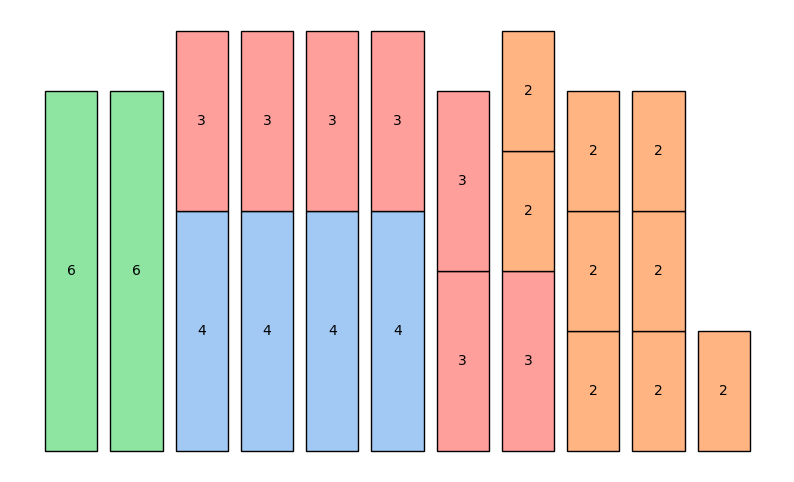

In [13]:
plot_demand(solution_ffd)

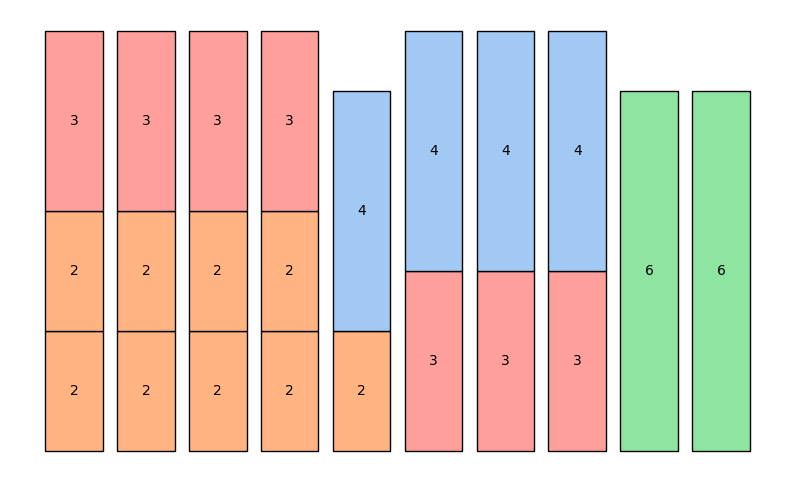

In [14]:
plot_demand(solution)